# Assignment 4
Submission from Maria Kagkeli, Maria Regina Lily, Mihai Verzan

## Problem 4-1: Power Laws

In [82]:
import numpy as np

In [81]:
degs = [3, 1, 1, 3, 2, 1, 7, 3, 1, 1, 1, 12, 2, 1, 4, 1, 1, 8, 1, 1]
sum_val = 0
for i in degs:
    sum_val += np.log(i/0.5)
    
print("sum_val = {}".format(sum_val))

gamma = 1 + len(degs)*(1/(sum_val))
print("Gamma = {}".format(gamma))

sigma = (gamma-1)/(np.sqrt(20))
print("Sigma = {}".format(sigma))

sum_val = 26.441627539966156
Gamma = 1.756383092144017
Sigma = 0.16913240110655092


## Problem 4-3: Measuring Real Networks

In [13]:
import pandas as pd
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
'''
We used the python package that was linked from the website given in the homework,
which can be found here: https://pypi.org/project/powerlaw/
'''
import powerlaw as pl

from jupyterthemes import jtplot
jtplot.style()

In [2]:
#read and clean-up data
data = pd.read_csv("facebook-links.txt.anon", sep="\t", header=None)
data = data.drop(axis = 1, columns = 2)
data.to_csv("facebook-links.txt", header=False, index=False, sep="\t")

In [3]:
#read clean-up data into an igraph graph and a networkx graph
G_ig = ig.Graph.Read_Edgelist("facebook-links.txt", directed=False)
G_nx = nx.read_edgelist("facebook-links.txt", delimiter="\t")

In [4]:
#make graph undirected and simple(no multiple edges)
G_ig = G_ig.simplify(multiple="False", loops="False")
G_nx = G_nx.to_undirected()

### 1. Diameter of graph

In [5]:
largest_comps = G_ig.largest_cliques()
## largest_comps returns two different largest connected components ?

comp = G_ig.subgraph(largest_comps[0])
diam = comp.diameter()
print("Diameter of largest_component 1 = {}".format(diam))
comp = G_ig.subgraph(largest_comps[1])
diam = comp.diameter()
print("Diameter of largest_component 2 = {}".format(diam))

## if you put these two componenets together:
comp = G_ig.subgraph(largest_comps[0]+largest_comps[1])
diam = comp.diameter()
print("Diameter of largest_component 1+2  = {}".format(diam))

Diameter of largest_component 1 = 1
Diameter of largest_component 2 = 1
Diameter of largest_component 1+2  = 2


### 2. ID and degree of node with highest degree

In [7]:
max_deg = G_ig.maxdegree()
max_node =  G_ig.vs.find(_degree = max_deg).index
print("Node ID = {},\t Degree = {}". format(max_node, max_deg))

Node ID = 2332,	 Degree = 1098


### 3. Number of triangles in the graph

In [8]:
#We could not figure how to do this with igraph, so we did this with networkx
triangles_dict = nx.triangles(G_nx)
triangles_count = sum(triangles_dict.values())/3
print("Number of triangles = {}".format(triangles_count))

Number of triangles = 3501542.0


### 4. Average local clustering coefficient

In [10]:
avg_cc = G_ig.transitivity_avglocal_undirected(mode="zero")
print("Average local clustering coefficient = {}".format(avg_cc))

Average local clustering coefficient = 0.22099020936535468


### 5. Power law fitting

### 6. Degree Distribution

In [78]:
import collections

degs = sorted(G_ig.degree())
degs_count = collections.Counter(degs)
deg, cnt = zip(*degs_count.items())

#fit = pl.Fit(degs, discrete=True, xmin=0)

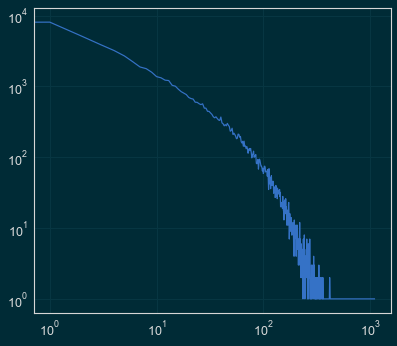

In [79]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

plt.plot(deg, cnt, color='b')
#fit.power_law.plot_pdf(ax=ax, color='r')
plt.show()